<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/PCA_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target


In [3]:

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y


In [4]:
print("First 5 rows of the dataset:\n", df.head())
print("\nStatistical summary:\n", df.describe())


First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Statistical summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50% 

In [5]:

scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [6]:
cov_matrix = np.cov(X_std.T)
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [8]:

print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [9]:
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key=lambda x: x[0], reverse=True)

In [10]:

W = np.hstack((eigenpairs[0][1].reshape(4, 1), eigenpairs[1][1].reshape(4, 1)))
X_pca = X_std.dot(W)


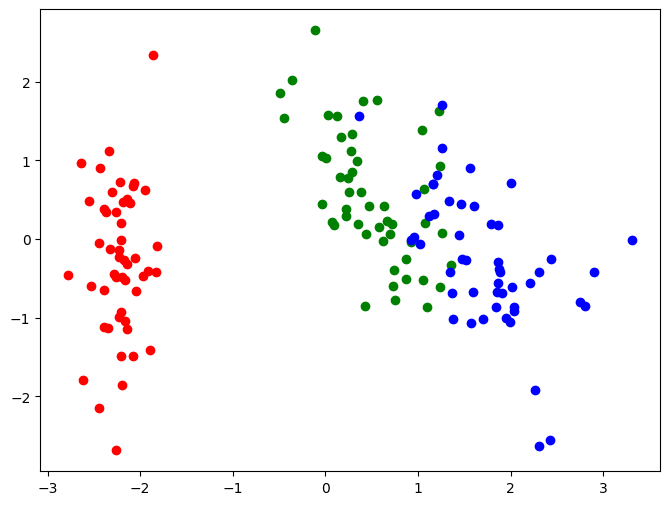

In [11]:
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, color in zip([0, 1, 2], colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=iris.target_names[i])


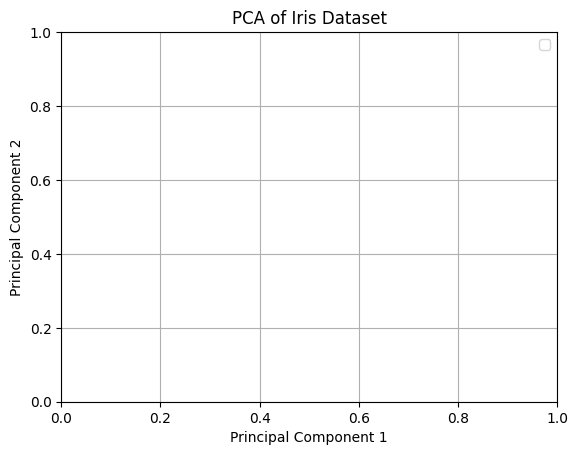

In [12]:
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.grid()
plt.show()